In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore") #ignoring some deprication warnings

In [3]:
# load the dataset
data = pd.read_csv("bodyfat.csv", 
                   na_values="?")
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
# check if any null values in dataset
print(data.isnull().sum())

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [5]:
# Create feature matrix and target vector
X = data.drop("BodyFat", axis=1)
y = data["BodyFat"]

y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
247    11.0
248    33.6
249    29.3
250    26.0
251    31.9
Name: BodyFat, Length: 252, dtype: float64

In [13]:
# Split data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

X_test

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
158,1.0704,30,136.50,68.75,35.9,88.7,76.6,89.8,50.1,34.8,21.8,27.0,34.9,16.9
83,1.0377,70,170.75,70.00,38.7,101.8,94.9,95.0,56.0,36.5,24.1,31.2,27.3,19.2
170,1.0926,35,152.25,67.75,37.0,92.2,81.9,92.8,54.7,36.2,22.1,30.4,27.4,17.7
101,1.0524,48,173.75,72.00,37.0,99.1,92.0,98.3,59.3,38.4,22.4,27.9,26.2,17.0
150,1.0776,26,152.25,69.00,35.4,92.9,77.6,93.5,56.9,35.9,20.4,31.6,29.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,1.0399,54,230.00,72.25,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6
15,1.0512,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9
152,1.0758,27,146.00,72.25,34.1,88.5,72.8,91.1,53.6,36.8,23.8,27.8,26.3,17.4
74,1.0720,61,143.00,65.75,36.5,93.4,83.3,93.0,55.5,35.2,20.9,29.4,27.0,16.8


In [7]:
# create pipeline with scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso # linear model

pipe = Pipeline([("preprocessing", StandardScaler()), ("model", Lasso())])

pipe

Pipeline(steps=[('preprocessing', StandardScaler()), ('model', Lasso())])

In [8]:
# grid search for all 3 models 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor # non-linear model
from sklearn.svm import SVR # non-linear model
from sklearn.preprocessing import MinMaxScaler


param_grid = [{"model": [Lasso(max_iter=2000)], 
               "model__alpha": [0.001, 0.01, 0.1, 1.0, 10.0],
               "model__fit_intercept": [True, False],
               "preprocessing": [StandardScaler(), MinMaxScaler()]
              },
              {"model": [RandomForestRegressor(random_state=0)], 
               "model__max_depth": [3, 5, 7, 9],
               "model__min_samples_split": [2, 5, 7],
               "model__max_features": ["log2", "sqrt"],
               "preprocessing": [None]
              }, 
              {"model": [SVR(kernel="rbf")], 
               "model__C": [0.01, 0.1, 1.0, 10.0, 100.0],
               "model__gamma": [0.001, 0.01, 0.1, 1.0, 10.0],
               "preprocessing": [StandardScaler(), MinMaxScaler()]
              }]

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid=[{'model': [Lasso(max_iter=2000)],
                          'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                          'model__fit_intercept': [True, False],
                          'preprocessing': [StandardScaler(), MinMaxScaler()]},
                         {'model': [RandomForestRegressor(random_state=0)],
                          'model__max_depth': [3, 5, 7, 9],
                          'model__max_features': ['log2', 'sqrt'],
                          'model__min_samples_split': [2, 5, 7],
                          'preprocessing': [None]},
                         {'model': [SVR()],
                          'model__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                          'model__gamma': [0.001, 0.01, 0.1, 1.0, 10.0],
                          'preprocessing': [StandardScaler(), MinMaxScaler()]}])

In [9]:
# print the top 20 best performing combinations
grid_results = pd.DataFrame.from_dict(grid.cv_results_)
grid_results.sort_values(by="rank_test_score").head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__alpha,param_model__fit_intercept,param_preprocessing,param_model__max_depth,param_model__max_features,...,param_model__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
89,0.006995,0.000636,0.001997,0.000005,SVR(),NaN,NaN,MinMaxScaler(),NaN,NaN,...,0.100,"{'model': SVR(), 'model__C': 100.0, 'model__ga...",0.988789,0.993808,0.918229,0.997458,0.969045,0.973466,0.029308,1
84,0.006587,0.001742,0.002003,0.000637,SVR(),NaN,NaN,StandardScaler(),NaN,NaN,...,0.001,"{'model': SVR(), 'model__C': 100.0, 'model__ga...",0.986579,0.998978,0.913213,0.997643,0.969221,0.973127,0.031797,2
8,0.004596,0.000488,0.001799,0.000400,Lasso(max_iter=2000),0.100,True,StandardScaler(),NaN,NaN,...,NaN,"{'model': Lasso(max_iter=2000), 'model__alpha'...",0.980534,0.994017,0.906883,0.995693,0.965607,0.968547,0.032681,3
5,0.003798,0.000748,0.001404,0.000492,Lasso(max_iter=2000),0.010,True,MinMaxScaler(),NaN,NaN,...,NaN,"{'model': Lasso(max_iter=2000), 'model__alpha'...",0.980459,0.994093,0.906101,0.995409,0.965682,0.968349,0.032935,4
4,0.004398,0.000489,0.001601,0.000491,Lasso(max_iter=2000),0.010,True,StandardScaler(),NaN,NaN,...,NaN,"{'model': Lasso(max_iter=2000), 'model__alpha'...",0.978796,0.993008,0.906302,0.994236,0.964221,0.967313,0.032400,5
1,0.004262,0.000387,0.001799,0.000399,Lasso(max_iter=2000),0.001,True,MinMaxScaler(),NaN,NaN,...,NaN,"{'model': Lasso(max_iter=2000), 'model__alpha'...",0.978759,0.992839,0.905959,0.993899,0.964092,0.967110,0.032446,6
0,0.018895,0.027824,0.002600,0.000489,Lasso(max_iter=2000),0.001,True,StandardScaler(),NaN,NaN,...,NaN,"{'model': Lasso(max_iter=2000), 'model__alpha'...",0.978460,0.991956,0.905054,0.993741,0.963676,0.966577,0.032609,7
9,0.003798,0.000393,0.001404,0.000481,Lasso(max_iter=2000),0.100,True,MinMaxScaler(),NaN,NaN,...,NaN,"{'model': Lasso(max_iter=2000), 'model__alpha'...",0.982350,0.990747,0.910536,0.989954,0.956432,0.966004,0.030402,8
86,0.011790,0.001166,0.002207,0.000400,SVR(),NaN,NaN,StandardScaler(),NaN,NaN,...,0.010,"{'model': SVR(), 'model__C': 100.0, 'model__ga...",0.982545,0.966116,0.929503,0.980808,0.970031,0.965801,0.019189,9
76,0.005194,0.000981,0.002400,0.000485,SVR(),NaN,NaN,StandardScaler(),NaN,NaN,...,0.010,"{'model': SVR(), 'model__C': 10.0, 'model__gam...",0.966589,0.965172,0.939236,0.975681,0.967676,0.962871,0.012368,10


In [27]:
# print test score
from sklearn.metrics import r2_score

best_model = SVR(C=100, gamma=0.1)
best_scaler = StandardScaler()
best_scaler.fit(X_train)
X_train_scaled = best_scaler.transform(X_train)
X_test_scaled = best_scaler.transform(X_test)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
print(f"test score: {r2_score(y_test, y_pred)}")

test score: 0.9365193899604995


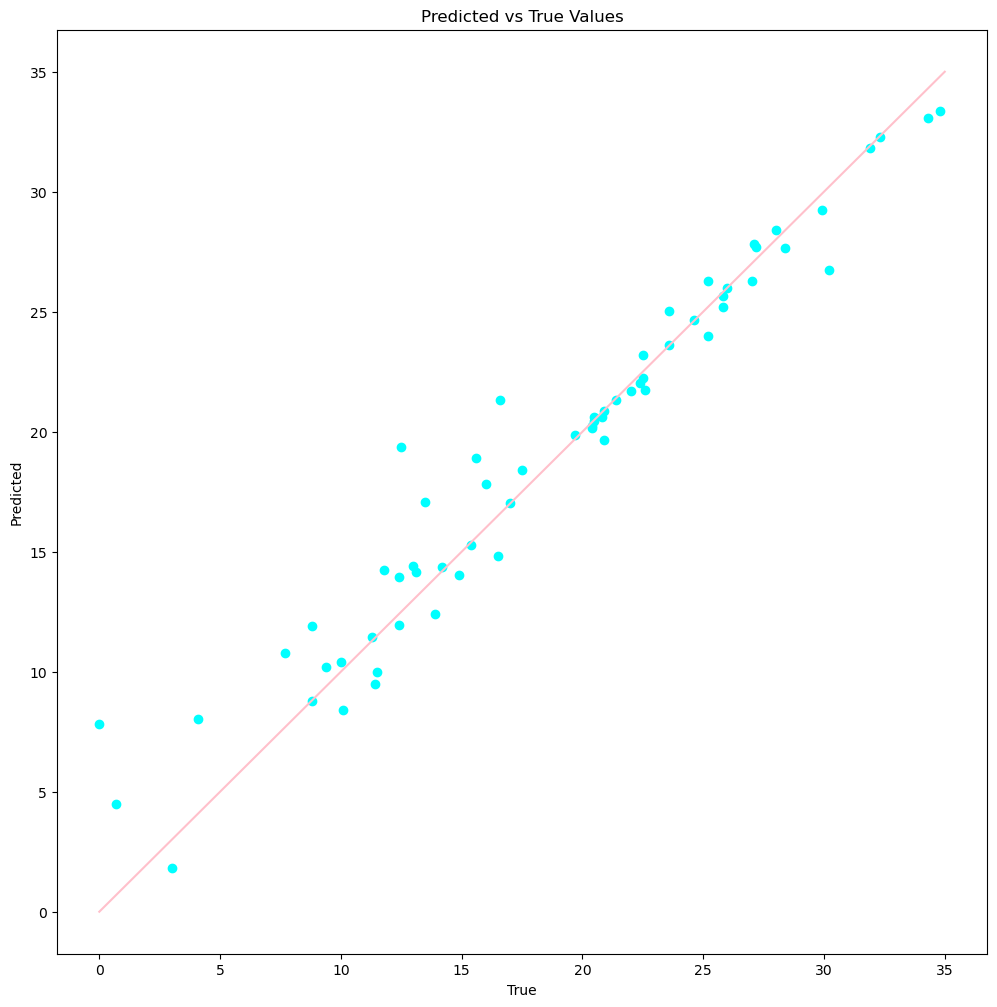

In [ ]:
# visualize results (predicted vs true)
plt.figure(figsize=(12, 12))
plt.scatter(y_test, y_pred, c="cyan")
plt.plot([0, 35], [0, 35], c="pink")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Predicted vs True Values")
plt.show()

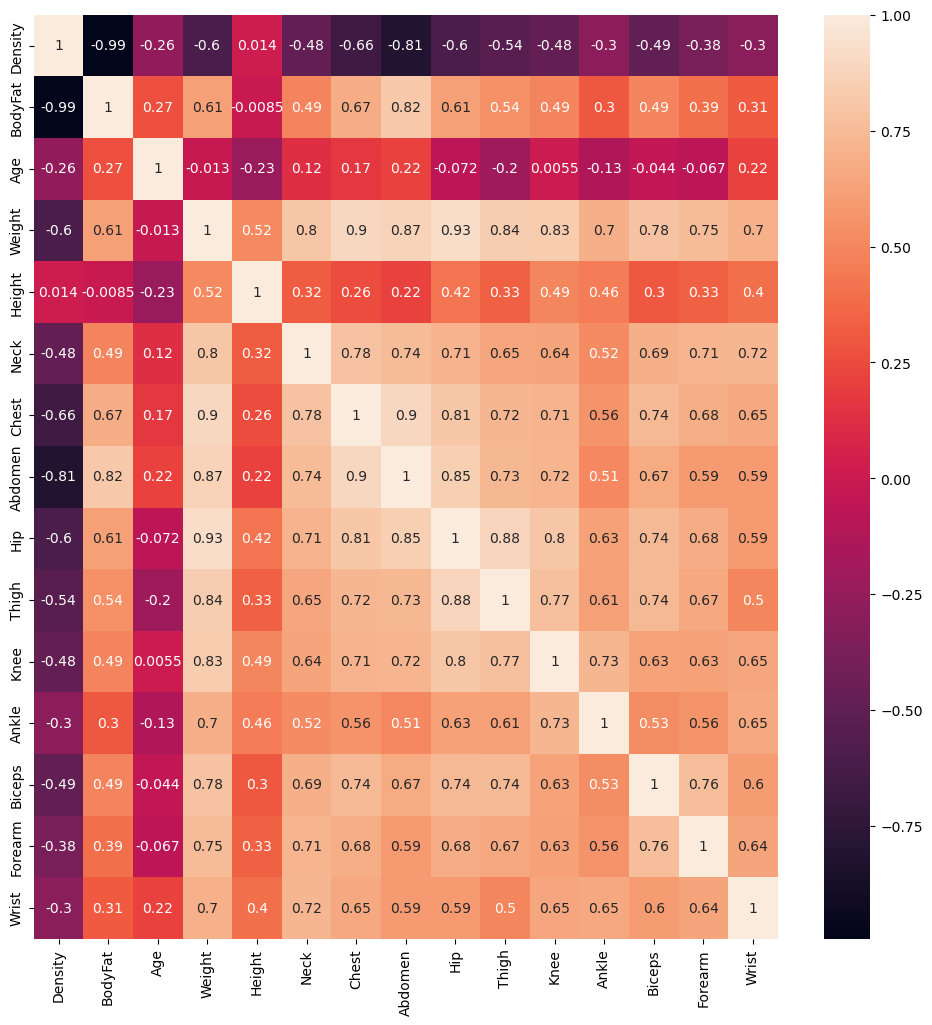

In [49]:
# visualize results
plt.figure(figsize=(12, 12))
g = sns.heatmap(data.corr(method='spearman'), annot=True)